# Many Gaussians

This algorithm requires install fab 

https://github.com/lollcat/fab-torch

In [1]:
import numpy as np
import torch
from fab.utils.plotting import plot_history, plot_contours
import matplotlib.pyplot as plt
from fab.target_distributions.gmm import GMM
from gradNS import HamiltonianNS, Param

In [2]:
dim = 2
n_mixes = 40
loc_scaling = 40.0  # scale of the problem (changes how far apart the modes of each Guassian component will be)
log_var_scaling = 1.0 # variance of each Gaussian
seed = 0

In [3]:
torch.manual_seed(0)  # seed of 0 for GMM problem
target = GMM(dim=dim, n_mixes=n_mixes,
              loc_scaling=loc_scaling, log_var_scaling=log_var_scaling,
              use_gpu=True, true_expectation_estimation_n_samples=int(1e5))

In [4]:
params = []

dim = 2
for i in range(dim):
    params.append(
        Param(
            name=f'p{i}',
            prior_type='Uniform',
            prior=(-50, 50),
            label=f'p_{i}')
    )

ns = HamiltonianNS(
    nlive=500,
    loglike=target.log_prob,
    params=params,
    verbose=True,
    clustering=False,
    tol=1e-2, 
    rejection_fraction=0.1, 
    dt_ini=1.
)

ns.run()

Decreasing dt to  0.5 out_frac =  tensor(0.3577) active =  250
Decreasing dt to  0.25 out_frac =  tensor(0.2156) active =  250
Active: 15 / 250
Active: 2 / 250
---------------------------------------------
logZ = -9.5754, eps = 4.2225e-01, 0.6146
Active: 26 / 250
Active: 8 / 250
Active: 1 / 250
---------------------------------------------
logZ = -9.4073, eps = 2.0579e-01, 0.3614
Active: 22 / 250
Active: 7 / 250
Active: 4 / 250
---------------------------------------------
logZ = -9.3227, eps = 1.1197e-01, 0.2076
Active: 13 / 250
---------------------------------------------
logZ = -9.2752, eps = 6.1479e-02, 0.1324
Decreasing dt to  0.125 out_frac =  tensor(0.1670) active =  250
Active: 41 / 250
Active: 3 / 250
---------------------------------------------
logZ = -9.2468, eps = 3.1906e-02, 0.0759
Active: 23 / 250
Active: 4 / 250
---------------------------------------------
logZ = -9.2315, eps = 1.6274e-02, 0.0402
Decreasing dt to  0.0625 out_frac =  tensor(0.1508) active =  250
Active

In [5]:
an = ns.convert_to_anesthetic()
ns_samples = an.posterior_points()
s = np.array(ns_samples[ns.paramnames])

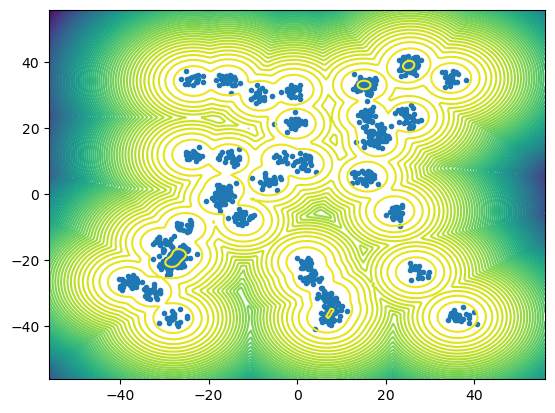

In [6]:
# plot target
target.to("cpu")
fig, ax = plt.subplots()
plotting_bounds = (-loc_scaling * 1.4, loc_scaling * 1.4)
plot_contours(target.log_prob, bounds=plotting_bounds, n_contour_levels=80, ax=ax, grid_width_n_points=200)
ax.scatter(s[:,0], s[:,1], marker='.')